In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from utils import utils
from utils import config

In [2]:
# Define the target and features
TARGET = "sentiment"
FEATURES = ["text", "title"]

## Data Preparation

In [3]:
data_raw = pd.read_csv("../res/input/cryptonews.csv")
df_tweets = data_raw.copy(deep=True)

data_raw.head()

,date,sentiment,source,subject,text,title,url
0,2023-04-05 06:52:09,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,2023-04-05 06:19:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,2023-04-05 05:09:44,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,2023-04-05 01:09:52,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,2023-04-04 23:49:00,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [4]:
df_tweets.describe()

,date,sentiment,source,subject,text,title,url
count,18543,18543,18543,18543,18543,18543,18543
unique,18304,3196,3,6,18131,18511,18543
top,2022-01-14 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Is it Too Late to Buy Shiba Inu? Crypto Expert...,https://cryptonews.com/news/celo-to-be-fastest...
freq,26,4195,8675,6439,326,4,1


In [5]:
df_tweets.isnull().sum()

date         0
sentiment    0
source       0
subject      0
text         0
title        0
url          0
dtype: int64

In [6]:
# Convert sentiment column from string to dict
df_tweets["sentiment"] = df_tweets["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(df_tweets["sentiment"])
df_tweets = pd.concat([df_tweets, df_sentiment], axis=1)

# Convert date column to datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'], format='mixed', errors='coerce')

df_tweets = df_tweets.drop(columns=["sentiment", "url"])
df_tweets = df_tweets.rename(columns={"class": "sentiment"})
df_tweets.head()

,date,source,subject,text,title,sentiment,polarity,subjectivity
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40


## Model training

### Pretrained

#### Ollama

In [7]:
ollama_model = "llama3.1:latest"

In [18]:
len(df_tweets)

18543

In [8]:
ollama_pipeline = utils.OllamaPipeline(
    df=df_tweets,
    features=FEATURES,
    target=TARGET,
    ollama_model=ollama_model,
    model_name=ollama_model,
)

Analyzing sentiment with Ollama: 20it [02:48,  8.41s/it]


,text,title
83,The developers compared the token to a liquid ...,Dfinity Unveils ckBTC for Faster and Affordabl...
53,"An exploit resulted in around $573,000 in cryp...",Allbridge exploiter returns most of the $573K ...
70,Macroeconomic headwinds continue to pressure t...,"Price analysis 4/3: SPX, DXY, BTC, ETH, BNB, X..."
45,BTC price action performs a 'classic sweep' of...,Bitcoin price bounces after CZ arrest rumors a...
44,The exchange currently facilitates cryptocurre...,Dragonfly Capital invests $10M in Bitget amid ...
39,Major European banks SEB and CrÃ©dit Agricole ...,European Traditional Finance Banks Join Forces...
22,The collaboration is set to allow founders bui...,Celo Foundation and Google Cloud partner to su...
80,The Ethereum developer believes deploying zk-E...,Vitalik Buterin Calls for Deployment of zk-EVM...
10,U.S. consumers sending international bank tran...,Crypto could eliminate 97% of traditional remi...
0,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...


83     neutral
53     neutral
70    positive
45    positive
44     neutral
39    positive
22     neutral
80    positive
10    positive
0     negative
18    positive
30     neutral
73     neutral
33    positive
90    positive
4     positive
76    negative
77     neutral
12    positive
31    positive
Name: sentiment, dtype: object

['neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral']

Classification Report for llama3.1:latest:
              precision    recall  f1-score   support

    positive       0.43      0.27      0.33        11
     neutral       0.20      0.29      0.24         7
    negative       0.33      0.50      0.40         2

    accuracy                           0.30        20
   macro avg       0.32      0.35      0.32        20
weighted avg       0.34      0.30      0.31        20

Confusion Matrix for llama3.1:latest:
[[0.27272727 0.63636364 0.09090909]
 [0.57142857 0.28571429 0.14285714]
 [0.         0.5        0.5       ]]


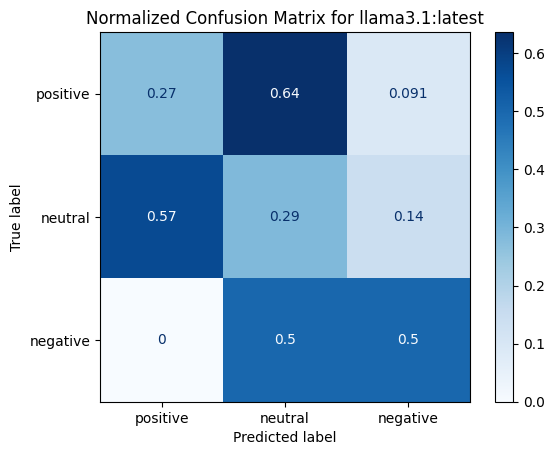

In [9]:
ollama_pipeline.evaluate()

### Supervised

#### NLTK-Randomforest

In [10]:
nltk_rf_model = utils.CustomPipeline(
    df_tweets,
    FEATURES,
    TARGET, 
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer()),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf"
)

In [11]:
nltk_rf_model.fit(False)
nltk_rf_model.fit(True)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.9s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  17.4s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.4s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  20.8s


Classification Report for nltk_rf_unbalanced model_unbalanced test data:
              precision    recall  f1-score   support

    positive       0.81      0.81      0.81      1666
     neutral       0.75      0.87      0.81      1298
    negative       0.80      0.55      0.65       745

    accuracy                           0.78      3709
   macro avg       0.78      0.75      0.76      3709
weighted avg       0.78      0.78      0.78      3709

Confusion Matrix for nltk_rf_unbalanced model_unbalanced test data:
[[0.81392557 0.14105642 0.04501801]
 [0.10246533 0.87442219 0.02311248]
 [0.25637584 0.19597315 0.54765101]]


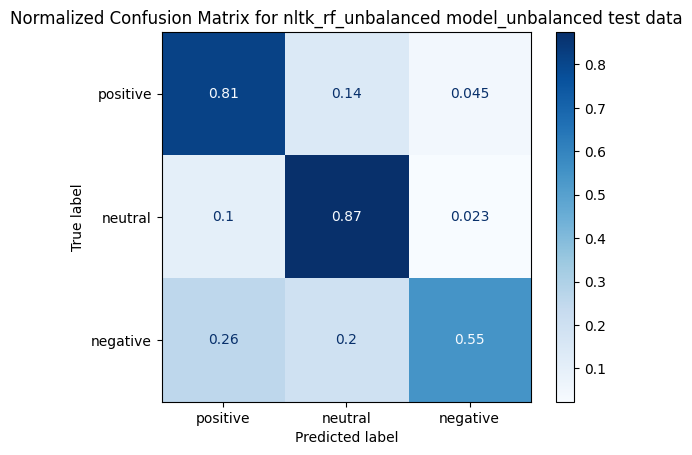

Classification Report for nltk_rf_balanced model_balanced test data:
              precision    recall  f1-score   support

    positive       0.92      0.77      0.84      1700
     neutral       0.84      0.96      0.89      1621
    negative       0.92      0.94      0.93      1657

    accuracy                           0.89      4978
   macro avg       0.89      0.89      0.89      4978
weighted avg       0.89      0.89      0.89      4978

Confusion Matrix for nltk_rf_balanced model_balanced test data:
[[0.77117647 0.15588235 0.07294118]
 [0.02714374 0.9611351  0.01172116]
 [0.03802052 0.02414001 0.93783947]]


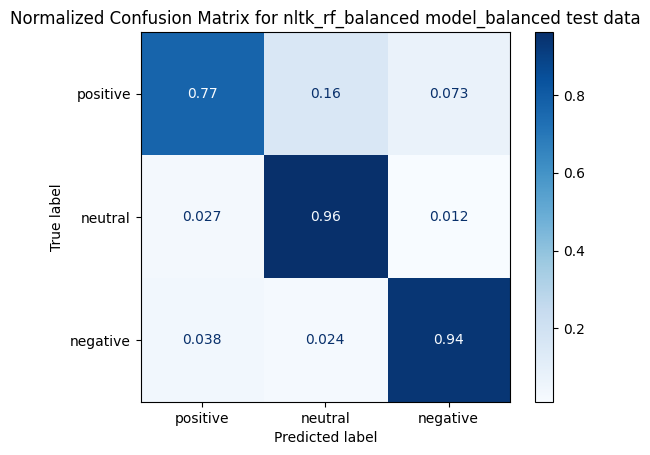

Classification Report for nltk_rf_balanced model_unbalanced test data:
              precision    recall  f1-score   support

    positive       0.97      0.96      0.96      1666
     neutral       0.94      0.96      0.95      1298
    negative       0.95      0.94      0.94       745

    accuracy                           0.95      3709
   macro avg       0.95      0.95      0.95      3709
weighted avg       0.95      0.95      0.95      3709

Confusion Matrix for nltk_rf_balanced model_unbalanced test data:
[[0.95858343 0.02881152 0.01260504]
 [0.03081664 0.95608629 0.01309707]
 [0.02281879 0.03892617 0.93825503]]


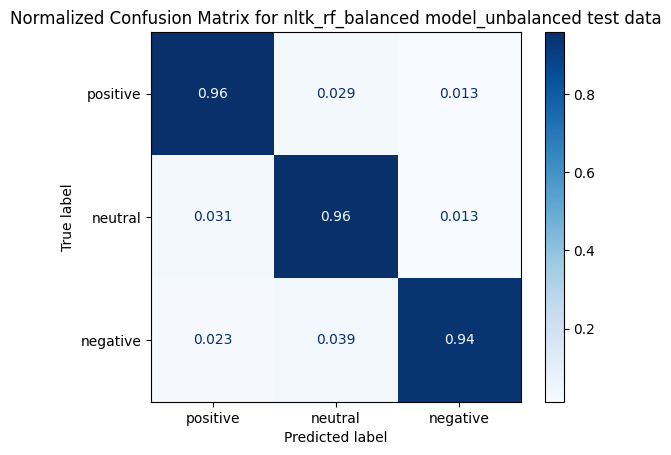

In [12]:
nltk_rf_model.evaluate(False, False)
nltk_rf_model.evaluate(True, True)
nltk_rf_model.evaluate(True, False)

In [13]:
nltk_rf_model.dump("../res/models")

#### NLTK-NGrams-RandomForest

In [14]:
nltk_rf_ngram_1_3_model = utils.CustomPipeline(
    df_tweets,
    FEATURES,
    TARGET, 
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer()),
                ('tfidf', (TfidfVectorizer(ngram_range=(1, 3)))),
            ]), feature) for feature in FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_n_gram_1_3"
)

In [15]:
nltk_rf_ngram_1_3_model.fit(True)
nltk_rf_ngram_1_3_model.fit(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   3.5s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 2.1min
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.7s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 2.0min


Classification Report for nltk_rf_n_gram_1_3_unbalanced model_unbalanced test data:
              precision    recall  f1-score   support

    positive       0.72      0.77      0.74      1666
     neutral       0.62      0.82      0.71      1298
    negative       0.82      0.25      0.38       745

    accuracy                           0.68      3709
   macro avg       0.72      0.61      0.61      3709
weighted avg       0.71      0.68      0.66      3709

Confusion Matrix for nltk_rf_n_gram_1_3_unbalanced model_unbalanced test data:
[[0.7695078  0.21068427 0.01980792]
 [0.17565485 0.81895223 0.00539291]
 [0.35973154 0.39194631 0.24832215]]


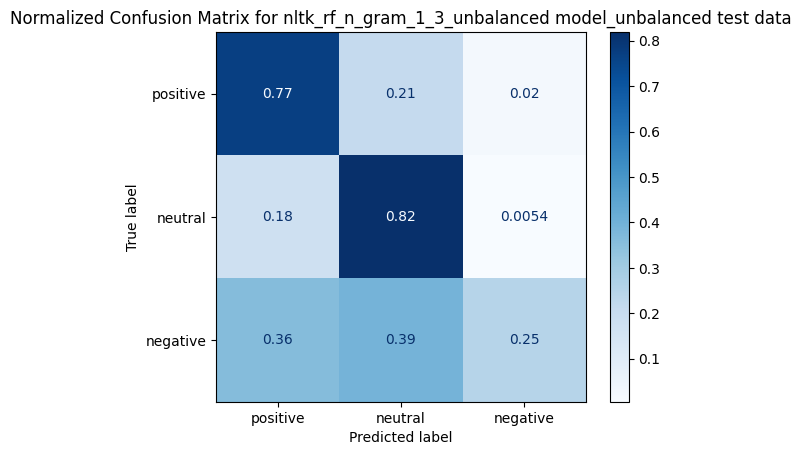

Classification Report for nltk_rf_n_gram_1_3_balanced model_balanced test data:
              precision    recall  f1-score   support

    positive       0.90      0.65      0.75      1700
     neutral       0.73      0.95      0.83      1621
    negative       0.92      0.91      0.92      1657

    accuracy                           0.84      4978
   macro avg       0.85      0.84      0.83      4978
weighted avg       0.85      0.84      0.83      4978

Confusion Matrix for nltk_rf_n_gram_1_3_balanced model_balanced test data:
[[0.64588235 0.28882353 0.06529412]
 [0.0388649  0.95373226 0.00740284]
 [0.03439952 0.05190103 0.91369946]]


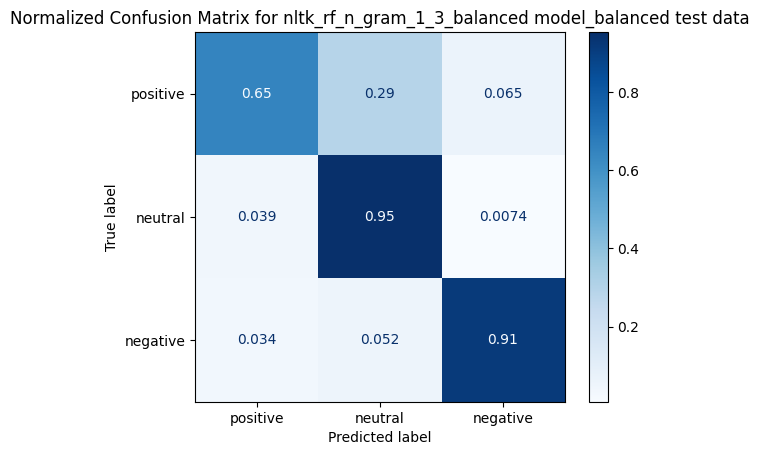

Classification Report for nltk_rf_n_gram_1_3_balanced model_unbalanced test data:
              precision    recall  f1-score   support

    positive       0.96      0.93      0.94      1666
     neutral       0.89      0.95      0.92      1298
    negative       0.94      0.90      0.92       745

    accuracy                           0.93      3709
   macro avg       0.93      0.92      0.93      3709
weighted avg       0.93      0.93      0.93      3709

Confusion Matrix for nltk_rf_n_gram_1_3_balanced model_unbalanced test data:
[[0.93037215 0.05582233 0.01380552]
 [0.03775039 0.94915254 0.01309707]
 [0.03221477 0.07248322 0.89530201]]


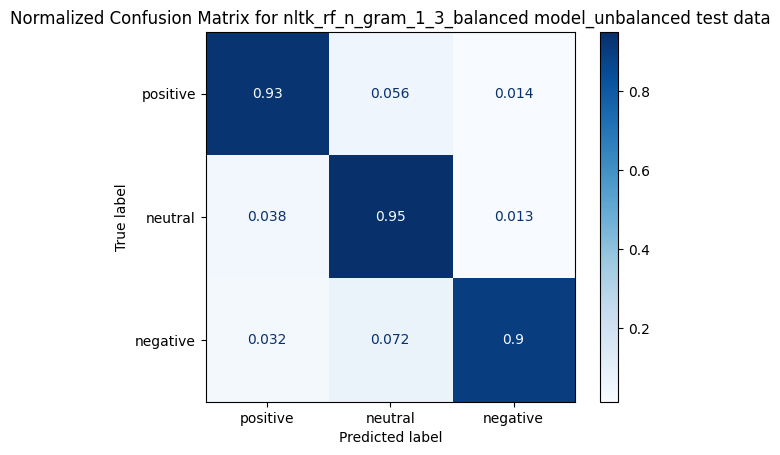

In [16]:
nltk_rf_ngram_1_3_model.evaluate(False, False)
nltk_rf_ngram_1_3_model.evaluate(True, True)
nltk_rf_ngram_1_3_model.evaluate(True, False)

In [17]:
# nltk_rf_ngram_1_3_model.dump("../res/models")